In [1]:
#encoding=utf-8
import jieba


seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=True)
print "Full Mode:", "/ ".join(seg_list) 


seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=False)
print "Default Mode:", "/ ".join(seg_list) 


Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
DEBUG:jieba:Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
Dumping model to file cache c:\users\user\appdata\local\temp\jieba.cache
DEBUG:jieba:Dumping model to file cache c:\users\user\appdata\local\temp\jieba.cache
Loading model cost 3.130 seconds.
DEBUG:jieba:Loading model cost 3.130 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


Full Mode: 大/ 巨蛋/ 案/ 對/ 市府/ 同仁/ 下/ 封口/ 封口令/ 口令/ / / / 柯/ P/ 否/ 認
Default Mode: 大/ 巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/ 　/ 柯/ P/ 否認


In [2]:
import jieba.posseg as pseg
words = pseg.cut("大巨蛋案對市府同仁下封口令？　柯P否認")
for w in words:
    print w.word, w.flag


大 a
巨蛋 n
案 ng
對 p
市府 n
同仁 nr
下 f
封口令 n
？ x
　x
柯 nr
P eng
否認 v


In [3]:
jieba.add_word('柯P',100, 'nr')
jieba.add_word('大巨蛋',100, 'ns')

In [4]:
sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = jieba.cut(sentence, cut_all=False)
print "/ ".join(words) 

大巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/ 　/ 柯P/ 否認


In [5]:
words = jieba.tokenize(unicode(sentence, 'utf-8'))

for tw in words:
    print tw[0], tw[1], tw[2]

大巨蛋 0 3
案對 3 5
市府 5 7
同仁 7 9
下 9 10
封口令 10 13
？ 13 14
　14 15
柯P 15 17
否認 17 19


In [6]:
import jieba.analyse
tags = jieba.analyse.extract_tags(sentence, 1)
print ",".join(tags)
tags = jieba.analyse.extract_tags(sentence, 1, allowPOS = ['nr'])
print ",".join(tags)


封口令
柯P


In [7]:
import jieba.analyse
sentence = "根據歐洲電商組織(Ecommerce Europe) 最新消息得知，\
該集團積極讓歐洲的包裹遞送服務與電商領域有更緊密結合。如此一來，\
便可解決電商物流的障礙。此組織總共結合歐洲 16 國的電商協會，\
目標整合歐洲的包裹物流市場，讓商品跨境更為順暢"
tags = jieba.analyse.extract_tags(sentence)
print '/'.join(tags)


歐洲/電商/組織/包裹/物流/一來/領域/遞送/緊密/Europe/市場/順暢/根據/決電商/服務/集團/總共結合/障礙/積極/目標


In [14]:
import sqlite3
db = sqlite3.connect('news.sqlite') 
cur = db.cursor()
cur.execute('select * from news_entry')
allNews = cur.fetchall()
newsary = [] 
for rec in allNews[0:10]:
    newsary.append(rec[5])
cur.close()
db.close()


前緋聞男友摔車斷勒骨　鬼鬼簡訊問候　
千億媳婦坐月子　笑納PRADA媽媽包
酒駕的代價　剛買的百萬休旅車毀了
Win10電腦歐亞銷售冠軍　是宏碁耶～
快關心偏鄉老人　東部老貧族高達8%　
【公庫】其實我們人少，也很弱
詹姆士派對戴假髮　網友讚：機智隱藏髮線 ...
聯發科攻物聯網　挺亞馬遜
阻斷身高差！佼佼拴住志玲　不讓她站起來
【公庫】兼任教師鐘點費不脫鈎！ 高教工會...


In [2]:
print newsary[0]

吳映潔（鬼鬼）今天出席中視中天新劇《少年四大名捕》見面會，被問到前緋聞男友胡宇威摔車斷勒骨住院一事，她委婉地說，「只有簡訊問候」，問怎沒去探病？她說：「很怪吧！」（葉婉如/台北報導）


In [4]:
import jieba
worddic = {}
for news in newsary:
    for wd in jieba.cut(news):
        if wd not in worddic:
            worddic[wd] = 1
        else:
            worddic[wd] = worddic[wd] + 1

Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
DEBUG:jieba:Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
Loading model from cache c:\users\user\appdata\local\temp\jieba.cache
DEBUG:jieba:Loading model from cache c:\users\user\appdata\local\temp\jieba.cache
Loading model cost 0.538 seconds.
DEBUG:jieba:Loading model cost 0.538 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


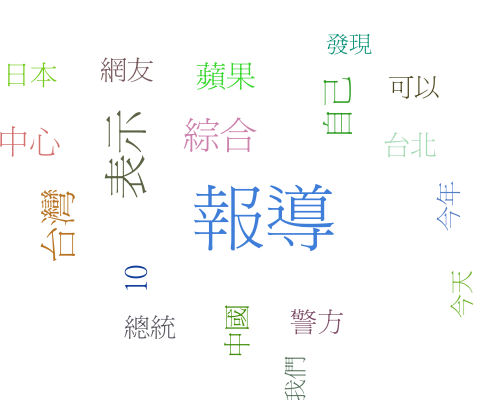

In [8]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image
from operator import itemgetter
swd = sorted(worddic.iteritems(), key=itemgetter(1), reverse=True)
swd = [w for w in swd[0:100] if len(w[0]) >= 2 and w != '']

tags = make_tags(swd, maxsize=60)
create_tag_image(tags, 'wc.png', size=(600,400), fontname='SimHei')
Image(filename='wc.png') 


In [22]:
import sqlite3
db = sqlite3.connect('news.sqlite') 
cur = db.cursor()
cur.execute('select * from news_entry')
allNews = cur.fetchall()
newsary = [] 
for rec in allNews:
    newsary.append(rec[5])
cur.close()
db.close()


In [27]:
import jieba
import jieba.analyse

worddic = {}
for news in newsary:
    #for wd in jieba.analyse.extract_tags(news):
    for wd in jieba.analyse.extract_tags(news, allowPOS = ['nr', 'n', 'ns']):
        if wd not in worddic:
            worddic[wd] = 1
        else:
            worddic[wd] = worddic[wd] + 1

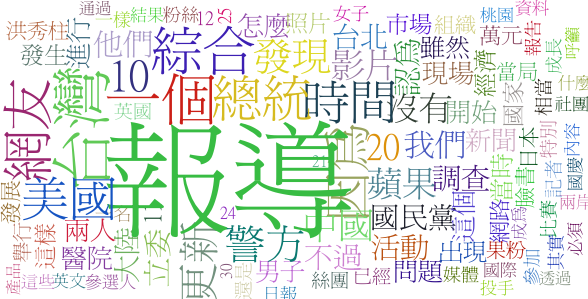

In [25]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image
from operator import itemgetter
swd = sorted(worddic.iteritems(), key=itemgetter(1), reverse=True)
swd = [w for w in swd[0:100] if len(w[0]) >= 2 and w[1] > 10 and w != '']

tags = make_tags(swd, maxsize=120)
create_tag_image(tags, 'wc.png', size=(600,300), fontname='SimHei')
Image(filename='wc.png') 


In [39]:
from IPython.display import display, HTML 

page= '''
  <head>
    <title>Word Cloud</title>
    <script src="tagcanvas.min.js" type="text/javascript"></script>
  </head>
  <body>
    <h1>Word Cloud</h1>
    <div id="myCanvasContainer">
      <canvas width="300" height="300" id="myCanvas">
        <p>Anything in here will be replaced on browsers that support the canvas element</p>
      </canvas>
    </div>
    <div id="tags"><ul id="weightTags">%s</ul></div>
  </body>
'''

js = '''
TagCanvas.Start('myCanvas','weightTags', {
 textFont: null,
 shape: "hcylinder",
 textColour: null,
 weight: true,
 weightMode: 'both',
 textFont: 'Impact,"Arial Black",sans-serif',
 /* more options */
 
});
$('#tags').css('display','None');
'''

import IPython
from IPython.core.display import display_html, display_javascript, Javascript

js_libs = ['tagcanvas.min.js']
li_str = ''
for li in swd:
    li_str += '<li><a href="" data-weight="10" style="font-size: %dex">%s</a></li>'%(li[1] /10 , li[0])
    
display_html(IPython.core.display.HTML(data=page%(li_str)))
display_javascript( Javascript(data=js, lib= js_libs))

Word Cloud 
 
 
 
 Word Cloud 
 
 
 Anything in here will be replaced on browsers that support the canvas element 
 
 
 報導 台灣 一個 綜合 網友 總統 因為 美國 時間 10 更新 警方 發現 20 中國 蘋果 影片 沒有 我們 他們 國民黨 調查 活動 認為 不過 立委 台北 大陸 怎麼 進行 新聞 醫院 開始 這個 兩人 現場 雖然 男子 問題 當時 經濟 發生 出現 11 這樣 市場 照片 國家 發展 萬元 網路 臉書 日本 當局 組織 洪秀柱 果粉 舉行 比賽 記者 12 已經 特別 絲團 相當 還是 英國 一樣 成長 其實 一名 25 參加 媒體 粉絲 報告 女子 資料 必須 參選人 國慶 兩岸 內容 成為 什麼 投手 社團 日報 這些 桃園 國際 英文 24 結果 產品 30 呼籲 透過 通過 21

In [59]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log(float(len(D)) / (len([doc for doc in D if t in doc])))
    return tf * idf


a, abb, abc = ["a"], ["a", "b", "b"], ["a", "b", "c"] 
d = ['d']
#D = [a, abb, abc]
D = [a, abb, abc, d]

print(tfidf("a", a, D))
print(tfidf("b", abb, D))
print(tfidf("a", abc, D))
print(tfidf("b", abc, D))
print(tfidf("c", abc, D))
print(tfidf("d", d, D))


0.287682072452
0.462098120373
0.0958940241506
0.231049060187
0.462098120373
1.38629436112


In [57]:
import scipy as sp

abb =  ["b", "a", "b"]
abb.count("b")

a, abb, abc = ["a"], ["a", "b", "b"], ["a", "b", "c"]
D = [a, abb, abc]

# calculate (tfidf("a", a, D))
# compute tf
a = ['a']
print float(a.count('a')) 
print sum(a.count(w) for w in set(a))
tf = 1.0 /1 
print tf


# compute idf
number_of_documents = float(len(D)) 
num_doc_contains_term =len([doc for doc in D if 'a' in doc])
idf = sp.log(number_of_documents/num_doc_contains_term )
print idf
#/ sum(d.count(w) for w in set(d))

1.0
1
1.0
0.0


In [1]:
import jieba
ary = ['【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理',
'留洪智坤 柯：殘障求職不易',
'人事處議處洪智坤　柯P：不清楚議處結果']
jieba.add_word('柯P', 100, 'nr')
jieba.add_word('議處', 100, 'v')
jieba.add_word('洪智坤', 100, 'n')
corpus = []
for title in ary:
    corpus.append(' '.join(jieba.cut(title)))


Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
DEBUG:jieba:Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
Loading model from cache c:\users\user\appdata\local\temp\jieba.cache
DEBUG:jieba:Loading model from cache c:\users\user\appdata\local\temp\jieba.cache
Loading model cost 0.520 seconds.
DEBUG:jieba:Loading model cost 0.520 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)

word = vectorizer.get_feature_names() 
for w in word:
    print w,
print
print X.toarray()


#ary = [
#'【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理',
#'留洪智坤 柯：殘障求職不易',
#'人事處議處洪智坤　柯P：不清楚議處結果']

不易 人事 今處理 公文 更新 柯p 案還 殘障 求職 洩漏 洪智坤 清楚 看到 結果 議處
[[0 0 1 2 1 1 1 0 0 1 1 0 1 0 0]
 [1 0 0 0 0 0 0 1 1 0 1 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 1 1 0 1 2]]


In [3]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray()    
print weight


[[ 0.          0.          0.31738473  0.63476946  0.31738473  0.24137927
   0.31738473  0.          0.          0.31738473  0.18745253  0.
   0.31738473  0.          0.        ]
 [ 0.54645401  0.          0.          0.          0.          0.          0.
   0.54645401  0.54645401  0.          0.32274454  0.          0.          0.
   0.        ]
 [ 0.          0.35517252  0.          0.          0.          0.27011786
   0.          0.          0.          0.          0.20977061  0.35517252
   0.          0.35517252  0.71034504]]


In [4]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf[0], tfidf).flatten()
print cosine_similarities


[ 1.          0.06049928  0.10452288]


In [5]:
related_docs_indices = cosine_similarities.argsort()[:-3:-1]
#related_docs_indices
for index in related_docs_indices:
    print ary[index]

【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理
人事處議處洪智坤　柯P：不清楚議處結果


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)
content = ["How to format my hard disk", " Hard disk format problems "]
X = vectorizer.fit_transform(content)
print vectorizer.get_feature_names()
print(X.toarray())


[u'disk', u'format', u'hard', u'how', u'my', u'problems', u'to']
[[1 1 1 1 1 0 1]
 [1 1 1 0 0 1 0]]


In [10]:
import os
posts = [open(os.path.join('toy', f)).read() for f in os.listdir('toy')]
print posts

['This is a toy post about machine learning. Actually, it contains not much interesting stuff.', 'Imaging databases provide storage capabilities.', 'Most imaging databases safe images permanently.', 'Imaging databases store data.', 'Imaging databases store data. Imaging databases store data. Imaging databases store data.']


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)

X_train = vectorizer.fit_transform(posts)
num_samples, num_features = X_train.shape

print("#samples: %d, #features: %d" % (num_samples,num_features)) 
print(vectorizer.get_feature_names())


#samples: 5, #features: 25
[u'about', u'actually', u'capabilities', u'contains', u'data', u'databases', u'images', u'imaging', u'interesting', u'is', u'it', u'learning', u'machine', u'most', u'much', u'not', u'permanently', u'post', u'provide', u'safe', u'storage', u'store', u'stuff', u'this', u'toy']


In [12]:
new_post = "imaging databases"
new_post_vec = vectorizer.transform([new_post])
print new_post_vec
print(new_post_vec.toarray())


  (0, 5)	1
  (0, 7)	1
[[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [15]:
import scipy as sp
def dist_raw(v1, v2):
    delta = v1-v2
    return sp.linalg.norm(delta.toarray())


In [16]:
import sys
best_doc = None
best_dist = sys.maxint
best_i = None
for i in range(0, num_samples):
    post = posts[i]
    if post==new_post:
        continue
    post_vec = X_train.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    print "=== Post %i with dist=%.2f: %s"%(i, d, post)
    if d<best_dist:
        best_dist = d
        best_i = i
print("Best post is %i with dist=%.2f"%(best_i, best_dist))


=== Post 0 with dist=4.00: This is a toy post about machine learning. Actually, it contains not much interesting stuff.
=== Post 1 with dist=1.73: Imaging databases provide storage capabilities.
=== Post 2 with dist=2.00: Most imaging databases safe images permanently.
=== Post 3 with dist=1.41: Imaging databases store data.
=== Post 4 with dist=5.10: Imaging databases store data. Imaging databases store data. Imaging databases store data.
Best post is 3 with dist=1.41


In [17]:
def dist_norm(v1, v2):
    v1_normalized = v1/sp.linalg.norm(v1.toarray())
    v2_normalized = v2/sp.linalg.norm(v2.toarray())
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta.toarray())


In [18]:
vectorizer = CountVectorizer(min_df=1, stop_words='english')
sorted(vectorizer.get_stop_words())[0:10]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost']

In [20]:
import nltk.stem
s= nltk.stem.SnowballStemmer('english')
print s.stem("graphics")

print s.stem("imaging")
print s.stem("image")
print s.stem("imagination")
print s.stem("imagine")



graphic
imag
imag
imagin
imagin


In [21]:
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))
vectorizer = StemmedCountVectorizer(min_df=1, stop_words='english')


In [27]:
X_train = vectorizer.fit_transform(posts)
num_samples, num_features = X_train.shape

print("#samples: %d, #features: %d" % (num_samples,num_features)) 
print(vectorizer.get_feature_names())

#samples: 5, #features: 17
[u'actual', u'capabl', u'contain', u'data', u'databas', u'imag', u'interest', u'learn', u'machin', u'perman', u'post', u'provid', u'safe', u'storag', u'store', u'stuff', u'toy']


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer,self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))
vectorizer = StemmedTfidfVectorizer(min_df=1,stop_words='english')


In [28]:
X_train = vectorizer.fit_transform(posts)
num_samples, num_features = X_train.shape

print("#samples: %d, #features: %d" % (num_samples,num_features)) 
print(vectorizer.get_feature_names())

#samples: 5, #features: 17
[u'actual', u'capabl', u'contain', u'data', u'databas', u'imag', u'interest', u'learn', u'machin', u'perman', u'post', u'provid', u'safe', u'storag', u'store', u'stuff', u'toy']


In [52]:
from xml.dom import minidom
from xml.etree import ElementTree
import jieba.analyse

f = open('1435449602.xml', 'r')
events=ElementTree.fromstring(f.read())
f.close()
corpus = []
ary= []
for elem in events.findall('./channel/item'):
    guid = elem.find('guid').text
    title = elem.find('title').text
    description = elem.find('description').text
    pubDate = elem.find('pubDate').text
    source = elem.find('source').text
    ary.append(title)
    corpus.append(' '.join(jieba.analyse.extract_tags(description, 20)))


In [53]:
#for title in ary:
#    print title
#for word in corpus:
#    print word

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names() 

In [74]:
print len(word)
#for ele in word:
#    print ele

1881


In [56]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray() 


In [58]:
from sklearn.metrics.pairwise import linear_kernel
n_cosine_similarities = linear_kernel(tfidf[0:10], tfidf[0:10])
#print n_cosine_similarities
print n_cosine_similarities.shape


(10, 10)


In [59]:
for title in ary[0:10]:
    print title

八仙塵爆  五相關人依公共危險重傷害法辦
八仙樂園意外 病患持續增加中
希臘國內三分一自動櫃員機現金短缺
台鐵新基隆車站29日正式啟用
6月28日各報頭版要聞
基改不算真食物  法國人知情就不買
八仙樂園舞台大火 逾400人輕重傷
女子世界盃足球賽  日擊敗澳洲晉4強
《農民曆小幫手》國曆六月二十八日
江蕙得「特別貢獻獎」 感恩金曲肯定她


In [60]:
%matplotlib inline


C:\Python27\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


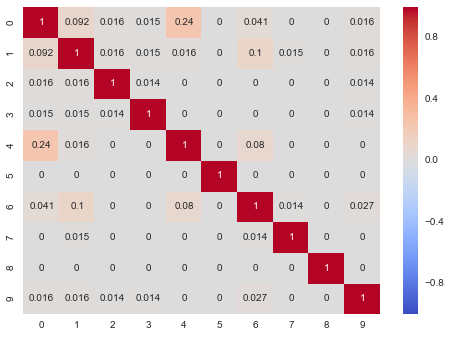

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.heatmap(n_cosine_similarities, annot=True, center=0, cmap='coolwarm')


In [65]:
related_docs_indices = n_cosine_similarities[0].argsort()[:-10:-1]
print related_docs_indices
for index in related_docs_indices:
    print ary[index]


[0 4 1 6 9 2 3 8 7]
八仙塵爆  五相關人依公共危險重傷害法辦
6月28日各報頭版要聞
八仙樂園意外 病患持續增加中
八仙樂園舞台大火 逾400人輕重傷
江蕙得「特別貢獻獎」 感恩金曲肯定她
希臘國內三分一自動櫃員機現金短缺
台鐵新基隆車站29日正式啟用
《農民曆小幫手》國曆六月二十八日
女子世界盃足球賽  日擊敗澳洲晉4強


In [66]:
from sklearn import cluster
c = cluster.KMeans(n_clusters=4)
k_data = c.fit_predict(weight)


In [67]:
print k_data.shape

(147,)


In [69]:
#for entry in k_data:
#    print entry

In [73]:
for id, i in enumerate(k_data):
    if i == 3:
        print ary[id]


希臘國內三分一自動櫃員機現金短缺
歐元區財長拒希臘延長救助計劃
羅志祥哭了 蔡依林讚表現很好
張娟芬專文：抽絲剝繭邱和順案
呂紹煒專欄：違約與退出 希臘與歐洲才能重生(上)
觀點投書：讀中文系的人，應該反對課綱微調
觀點投書：何謂新兵訓練
希臘違約在即  歐盟全力穩定經濟
希臘脫歐變可能 歐洲衝擊大
希債協議  法國願盡最後斡旋努力
旺報觀點－鄭弘儀！別讓台灣人背黑鍋！
陸祭出新規 能上能下整肅官場
首例 馬頒紀念章給新四軍老兵
社論－真道理性真愛台灣系列 7 打一場讓社會公平的
希臘1／3提款機錢被提光
確保銀行穩定 希臘續與ECB緊密合作
希臘態度強硬 歐元區耐心漸失
希臘盼展延債務 歐元區拒絕


In [95]:
n_cosine_similarities = linear_kernel(tfidf, tfidf)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(n_cosine_similarities)

print pca_data.shape
print pca_data

(147, 2)
[[ -4.82892054e-01  -1.20848312e-01]
 [ -3.31142404e-01  -1.19192847e-01]
 [  1.34610908e-01   1.86601595e-01]
 [  1.02922389e-01   1.42994038e-01]
 [ -5.06425207e-01  -9.92628015e-02]
 [  1.26330216e-01   1.61720131e-01]
 [ -3.89858868e-01  -7.33056414e-02]
 [  8.14725884e-02   1.00776437e-01]
 [  1.15130699e-01   1.42930063e-01]
 [  1.68517584e-01  -3.88867681e-02]
 [  1.03240992e-01   1.66763598e-01]
 [ -4.88734424e-01  -1.01991800e-01]
 [  1.70736604e-01   2.55362674e-01]
 [  2.08037230e-01  -3.13014231e-01]
 [  4.34740660e-01  -7.16871002e-01]
 [  1.49657977e-01   1.62001716e-01]
 [ -5.81561390e-01  -1.58725031e-01]
 [  1.04598017e-01   1.47557706e-01]
 [  1.07013227e-01   1.46104427e-01]
 [  1.14682794e-01   1.36403297e-01]
 [  4.46854478e-01  -7.19960993e-01]
 [ -1.77496879e-01   4.12482065e-02]
 [  1.17953887e-01   1.07804844e-01]
 [  1.15130699e-01   1.42930063e-01]
 [  1.17749129e-01   2.26429938e-01]
 [ -5.86662563e-01  -1.55249189e-01]
 [  1.31038638e-01   1.564244

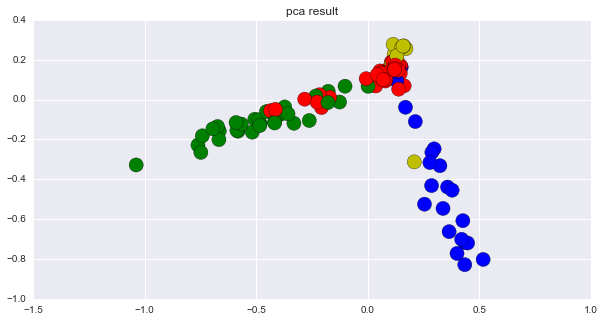

In [97]:
fig, axes = plt.subplots(ncols=1, nrows=1,figsize=(10,5))
axes.scatter(pca_data[:,0], pca_data[:,1], c=['rgbyc'[i] for i in k_data ], s=200)
axes.set_title('pca result')

In [98]:
a = [1,2,3,4,5]
print a[:-5:-1]

[5, 4, 3, 2]


In [99]:
a = 'i love new york'
print a[::-1]

kroy wen evol i


In [ ]:
'ATTGCTGACTGA'